In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [4]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


# Part 1: Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

## 1. Frequency Tables:

- Generate a frequency table for the product category.
- Which are the top 5 most listed product categories?

In [5]:
frequency_category = df['category'].value_counts()
frequency_category

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Motorbike Chassis                            107
Alexa Built-In Devices                       107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

Los 5 productos que mas aparecen en la lista son:
- SPORTS & OUTDOORS
- BEAUTY
- HANDMADE CLOTHING, SHOES & ACCESORIES
- BATH & BODY
- BIRTHDAY GIFTS

## 2. Visualizations:

- Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.

C:\Users\luisf\AppData\Local\Temp\ipykernel_23736\2305045764.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_category.values[:5], y=frequency_category.index[:5], palette="viridis")


<Axes: ylabel='category'>

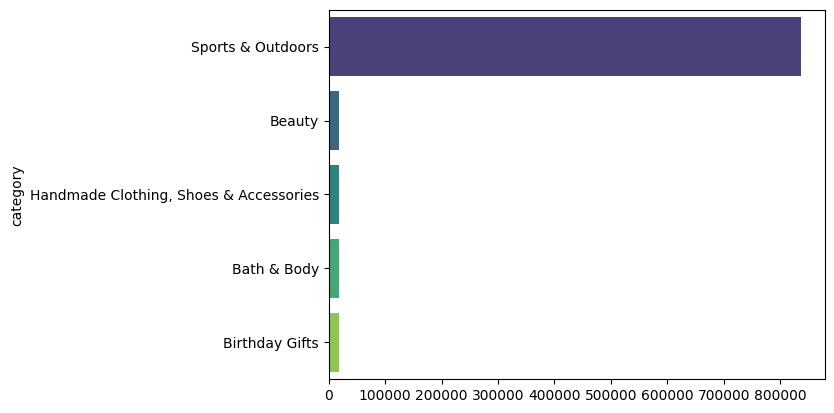

In [6]:
sns.barplot(x=frequency_category.values[:5], y=frequency_category.index[:5], palette="viridis")

- For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [7]:
top5 = frequency_category.head(5)

([<matplotlib.patches.Wedge at 0x1f5205e5a10>,
 [Text(-0.2866672010385232, -1.0619896025144215, 'Sports & Outdoors'),
  Text(0.4891710567013495, 0.9852470133350749, 'Beauty'),
  Text(0.35457806228290323, 1.041284974321488, 'Handmade Clothing, Shoes & Accessories'),
  Text(0.21457386835526904, 1.078868877583859, 'Bath & Body'),
  Text(0.07179061673262975, 1.0976548215851598, 'Birthday Gifts')],
 [Text(-0.15636392783919445, -0.5792670559169572, '91.6%'),
  Text(0.26682057638255424, 0.5374074618191317, '2.1%'),
  Text(0.1934062157906745, 0.5679736223571752, '2.1%'),
  Text(0.11704029183014672, 0.5884739332275595, '2.1%'),
  Text(0.03915851821779804, 0.5987208117737234, '2.1%')])

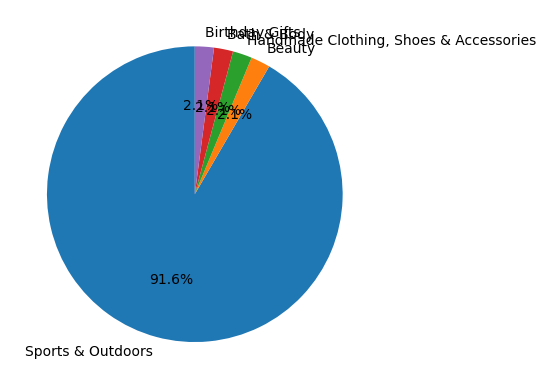

In [8]:
plt.pie(top5.values, labels=top5.index, autopct='%1.1f%%', startangle=90)

La cateogria que predomina es 'Sports & Outdoors'.

# Part 2: Delving into Product Pricing
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

## 1. Measures of Centrality:

- Calculate the mean, median, and mode for the price of products.

In [9]:
mean_price = df['price'].mean()
median_price= df['price'].median()
mode_price = df['price'].mode()[0]

print(f'Mean : ', mean_price)
print(f'Median : ', median_price)
print(f'Mode : ', mode_price)

Mean :  89.24380943923661
Median :  19.09
Mode :  9.99


- What's the average price point of products listed? How does this compare with the most common price point (mode)?

El precio medio es 89.24, pero el precio mas común es 9.99.

## 2. Measures of Dispersion:

- Determine the variance, standard deviation, range, and interquartile range for product price.

In [10]:
var_price = df['price'].var()
std_price = df['price'].std()
range_price = df['price'].max() - df['price'].min()
interquartile_price = df['price'].quantile(0.75) - df['price'].quantile(0.25)

print(f'Variance : ', var_price)
print(f'Standard deviantion : ', std_price)
print(f'Range : ', range_price)
print(f'Interquartile : ', interquartile_price)

Variance :  119445.48532254901
Standard deviantion :  345.60886175349873
Range :  100000.0
Interquartile :  36.0


- How varied are the product prices? Are there any indicators of a significant spread in prices?

Los precios son super variados. La variance y la desviacion estandar son altisimos. El ranog marca una diferencia muy amplia.

## 3. Visualizations:

- Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..

<Axes: xlabel='price', ylabel='Count'>

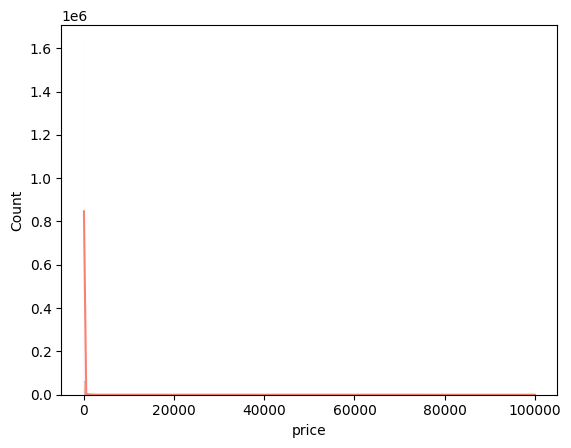

In [11]:
sns.histplot(df['price'], kde=True, color="salmon")

Si, es ilegible porque hay unos precios demasiado altos que hacen que el eje x se extienda hasta tal punto de que no deje leer los resultados. Se podria limitar el rango de lectura.

- Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

<Axes: xlabel='price'>

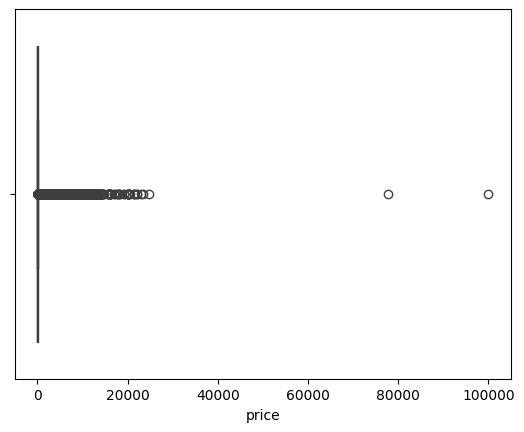

In [12]:
sns.boxplot(x=df['price'])

Hay tantos outliers que el boxplot es ilegible

# Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

## 1. Measures of Centrality:

- Calculate the mean, median, and mode for the rating of products.
- How do customers generally rate products? Is there a common trend?

In [17]:
stars_0 = df[df['stars'] > 0]['stars']

mean_stars= stars_0.mean()
median_stars = stars_0.median()
mode_stars = stars_0.mode()[0]

print(f'Mean : ', mean_stars)
print(f'Median : ', median_stars)
print(f'Mode : ', mode_stars)

Mean :  4.319160762226911
Median :  4.4
Mode :  4.5


## 2. Measures of Dispersion:

- Determine the variance, standard deviation, and interquartile range for product rating.
- Are the ratings consistent, or is there a wide variation in customer feedback?

In [19]:
var_stars = stars_0.var().round(2)
std_stars = stars_0.std().round(2)
interquartile_stars = stars_0.quantile(0.75) - stars_0.quantile(0.25)

print(f'Variance : ', var_stars)
print(f'Standard deviantion : ', std_stars)
print(f'Interquartile : ', interquartile_stars)

Variance :  0.31
Standard deviantion :  0.56
Interquartile :  0.5


## 3. Shape of the Distribution:

- Calculate the skewness and kurtosis for the rating column.
- Are the ratings normally distributed, or do they lean towards higher or lower values?

In [20]:
skewness_stars = stars_0.skew()
kurtosis_stars = stars_0.kurtosis()

skewness_stars, kurtosis_stars

(np.float64(-2.379568112212799), np.float64(9.78193769066435))

## 4. Visualizations:

- Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

<Axes: xlabel='stars', ylabel='Count'>

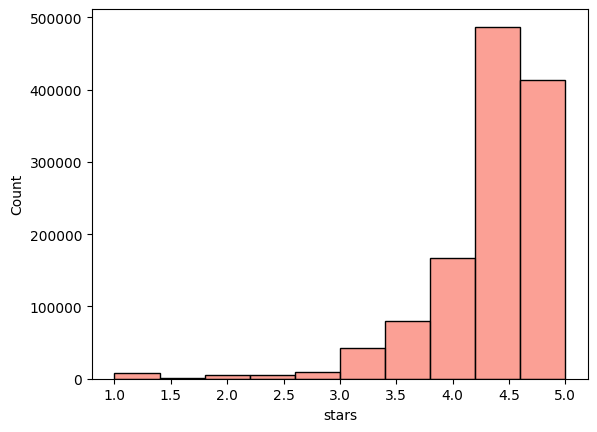

In [24]:
sns.histplot(stars_0, bins=10, color="salmon")

Las puntuaciones de 4.5 y 5 son las mas comunes